## 1.正态性检验——以二手房数据分析为例

### (1).直方图法

In [4]:
# 导入第三方模块
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 读入外部数据
sec_buildings  = pd.read_excel(r'sec_buildings.xlsx')
# 数据的预览
sec_buildings.head()

,block,type,size,region,height,direction,price,built_date,price_unit
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,朝南,500,1992年建,104777
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,朝南,735,2002年建,67474
2,博山小区,1室1厅,43.79,浦东,中区/6层,朝南,260,1988年建,59374
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,朝南北,280,1997年建,67210
4,博山小区,1室0厅,39.77,浦东,高区/6层,朝南,235,1987年建,59089


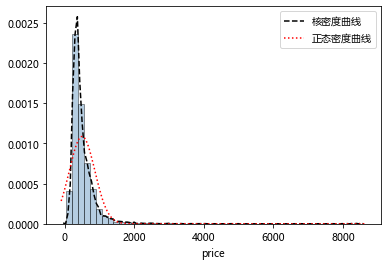

In [5]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
# 基于直方图判断数据是否服从正态分布
sns.distplot(a = sec_buildings.price, # 指定绘图数据
             fit = stats.norm, # 指定绘制理论的正态分布曲线
             norm_hist = True, # 绘制频率直方图
             # 设置直方图的属性（填充色和边框色）
             hist_kws = {'color':'steelblue', 'edgecolor':'black'}, 
             # 设置核密度曲线的属性（线条颜色、类型和标签）
             kde_kws = {'color':'black', 'linestyle':'--', 'label':'核密度曲线'}, 
             # 设置理论正态分布曲线的属性（线条颜色、类型和标签）
             fit_kws = {'color':'red', 'linestyle':':', 'label':'正态密度曲线'})
# 显示图例
plt.legend()
# 显示图形
plt.show()

## (2)PP图与QQ图

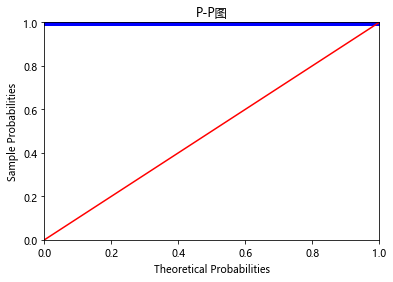

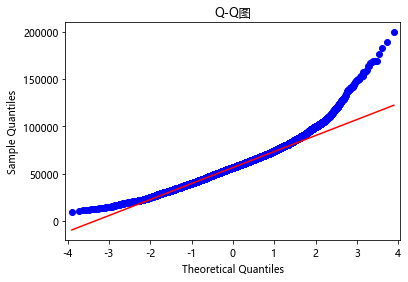

In [8]:
# 基于PP图和QQ图判断数据是否服从正态分布
pp_qq_plot = sm.ProbPlot(sec_buildings.price_unit)
# 绘制PP图
pp_qq_plot.ppplot(line = '45')
plt.title('P-P图')
# 绘制QQ图
pp_qq_plot.qqplot(line = 'q')
plt.title('Q-Q图')
# 显示图形
plt.show()

## (3)Shapiro检验法和K-S检验法

In [9]:
# 基于定量的统计方法判断数据是否服从正态分布
stats.kstest(rvs = sec_buildings.price, # 指定待检验的数据
             # 利用实际数据的均值和标准差设定理论的正态分布
             args = (sec_buildings.price.mean(), sec_buildings.price.std()), 
             cdf = 'norm' # 指定累计分布函数为正态函数
            )

KstestResult(statistic=0.1683380890487141, pvalue=0.0)

In [10]:
# 导入第三方模块
import numpy as np

# 生成正态分布和均匀分布随机数
x1 = np.random.normal(loc = 5, scale=2, size = 3500)
x2 = np.random.uniform(low = 1, high = 100, size = 4000)
# 正态性检验
Shapiro_Test1 = stats.shapiro(x = x1)
Shapiro_Test2 = stats.shapiro(x = x2)

# 打印检验结果
print(Shapiro_Test1)
print(Shapiro_Test2)

(0.9995139837265015, 0.5456996560096741)
(0.9532173275947571, 5.531665652506002e-34)


# 2.卡方检验——以吸烟与呼吸道疾病关系分析研究